# Problem statement


it is an advertisement data and the amount spent on the various medium of channel for an advertisement.The solution that is looking for is to predict the sales basis 3 component. It is a regression problem.

Features
Advertisement throght TV- which says that amount spent on TV Ad
Advertisement throght Radio- which says that amount spent on radio Ad
Advertisement throght newspaper- which says that amount spent on newspaper Ad

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [4]:
adv_ds = pd.read_csv("Advertising.csv",usecols=["TV","radio","newspaper","sales"])
adv_ds1 = adv_ds.copy()
adv_ds.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
adv_ds.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
adv_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observation

Dataset has 4 columns including a response variable sales along with the 200 observations
There is no missing values in the dataset
All the columns are float type

In [8]:
#check some statistics
adv_ds.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


obervation

data points look skewed data
it has been observed that min amount spend on radio advertisement is 0 which cannot be the case. we will have to treat it

In [9]:
print(adv_ds.isnull().sum()) # checking the missing value 
adv_ds["radio"]  =adv_ds["radio"].replace(0, np.nan)
adv_ds["radio"]  =adv_ds["radio"].fillna(adv_ds["radio"].median())  # imputing the missing value with median

print("After imputation\n")
print(adv_ds.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64
After imputation

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


observation

Since 0 values has been replaced with NAN and now we can impute it. for the imputation , we can take median value because there is only one missing and it wont impact the data

# Univariate Analysis

Observation 

Newspapaer and radio are right skewed data however TV is the left skewed distribution

<AxesSubplot:>

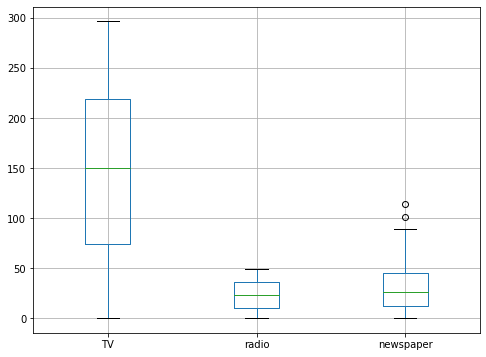

In [11]:
# Boxplot
adv_ds.iloc[:,:-1].boxplot(figsize =(8,6))

Observation

Data seems clean, we seen two outlier points in newspaper which is near to whisker
we will check the skewness and treat it accordinlgy

In [13]:
adv_ds.iloc[:,:-1].skew()

TV          -0.069853
radio        0.091924
newspaper    0.894720
dtype: float64

In [14]:
adv_ds["newspaper"] =  adv_ds["newspaper"].map(lambda x: np.sqrt(x)) # treating skewed columns by changing it with sqrt  
adv_ds.iloc[:,:-1].skew()

TV          -0.069853
radio        0.091924
newspaper    0.062388
dtype: float64

Newspaper columns is higly skewed. we have checked various transformations and found that sqrt is more suitable transformation thus applyied the same

# Bivariate analysis

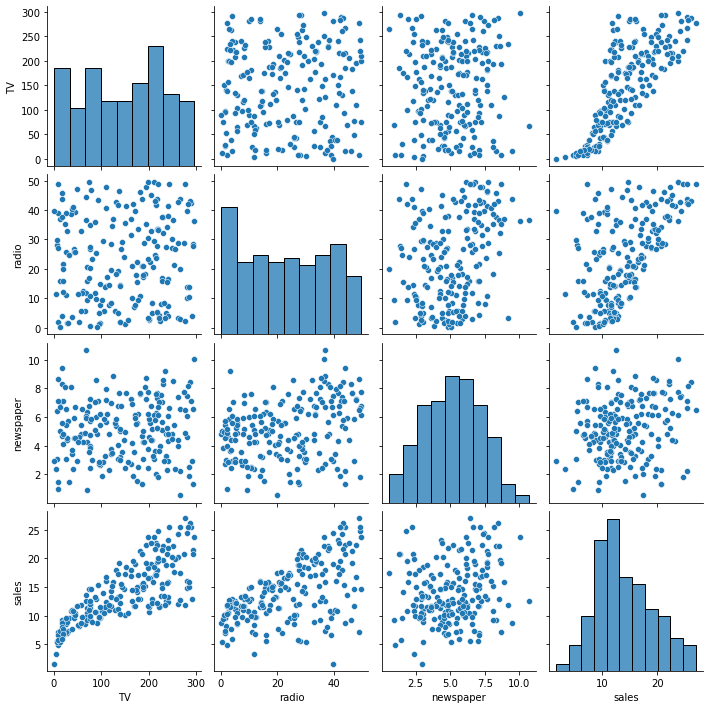

In [15]:
sns.pairplot(adv_ds)

Observation 

we see positive correlation of TV and radio with sales however newspaper is more scattered
there is no relation between independent variables

<AxesSubplot:>

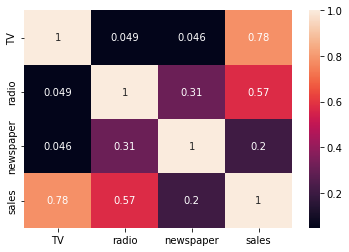

In [17]:
sns.heatmap(adv_ds.corr(),annot = True)

as seen in the pair plot, TV and radio have positive correlation

# data Modeling

In [18]:
# sepratating data into train and test

X = adv_ds[["TV","radio","newspaper"]]
y = adv_ds["sales"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.22, random_state =100)


In [19]:
model = [LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]
for models in model:
    models.fit(X_train,y_train)
    print(f"training_score {models.score(X_train,y_train)}")
    pred = models.predict(X_test)      
    print(f"test_score {models.score(X_test,y_test)}")
    print(f"mean_squared_error of {models} is {mean_squared_error(y_test,pred)}")
    print(f"r2_score {models} is {r2_score(pred,y_test)} \n")          

training_score 0.8925827028620413
test_score 0.9113559397779302
mean_squared_error of LinearRegression() is 1.7385462830161245
r2_score LinearRegression() is 0.9024271146387894 

training_score 0.9702395941549004
test_score 0.9750954065986623
mean_squared_error of KNeighborsRegressor() is 0.48844545454545485
r2_score KNeighborsRegressor() is 0.972752658440762 

training_score 0.8274622783083907
test_score 0.8398101347363482
mean_squared_error of SVR() is 3.1417502101470514
r2_score SVR() is 0.6830882401988471 

training_score 1.0
test_score 0.9620143418035023
mean_squared_error of DecisionTreeRegressor() is 0.745
r2_score DecisionTreeRegressor() is 0.9596594468808736 



In [20]:
# Performing grid search CV
knn = KNeighborsRegressor()

parameter = {"n_neighbors" :[5,6,7,8],"weights" : ['uniform', 'distance'],"algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']
            ,"p": [1,2] }

gridcv = GridSearchCV(knn,parameter, cv =5, n_jobs = -1, verbose =1, scoring = "neg_mean_squared_error")
gridcv.fit(X_train,y_train)
gridcv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

observation

As already mentioned that KNN has performed well out of other algorithms, KNN has been given to grid search CV to find out the best parameter for hyperparameter and trained the model.we hae selected some important internal parameter of the algorithm in the form of dictionary
Mean_sqared_error is selected as evaluation matrix.
Algorithm has given best parameters and we are training our model basis on that

In [21]:
gridcv.best_score_
# Mean_squared_error, the more it is close to 0 it represents better model

-1.1834294346862062

In [22]:
hyper_KNN = KNeighborsRegressor(n_neighbors = 5,weights="distance",algorithm = "auto",p=1)
CVS = cross_val_score(hyper_KNN,X,y,cv =5)
print(f" The mean is {CVS.mean()} and SD is {CVS.std()}")

 The mean is 0.964572832026579 and SD is 0.012656835981359546


using the cross valiation wit 5 CV and checking that how 5 CV (models) gives average accuracy. Accuracy seems good with small standard deviation

# Modeling Saving

In [23]:
import pickle
hyper_KNN.fit(X,y)
with open("sale_prediction","wb") as f:
    pickle.dump(hyper_KNN,f)